In [263]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# 1. Coefficient of variation and Fano factor (4 points)

In [264]:
## Load spike times
spike_times = np.loadtxt('SpikeTimes.dat') # in [ms]. 
spike_times /= 1000 # [ms] to [s].

assert spike_times.shape[0] == 100  # maximum spike-time index.
assert spike_times.shape[1] == 100  # number of trials.

In [265]:
T = 5.5 # # trial length in [s]
time_resolution = 100 # [s]

### (1.a) Make a raster plot of the data.

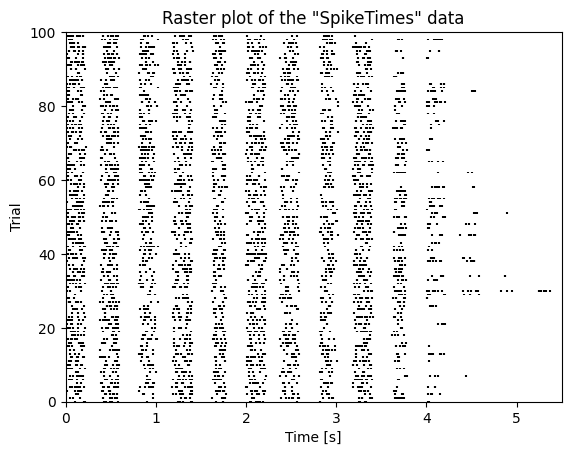

In [266]:
# @param positions: rows are trial and column are spike times.
plt.eventplot(positions=spike_times.T, linelengths=0.5, lineoffsets=1, colors='black')
plt.ylim(0, time_resolution)
plt.xlim(0, T)
plt.title('Raster plot of the "SpikeTimes" data')
plt.xlabel('Time [s]')
plt.ylabel('Trial')
plt.show()

### (1.b) Plot a histogram of the ISIs pooled across trials.

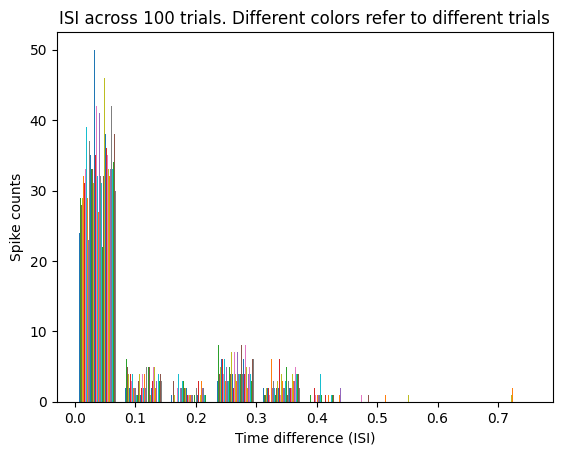

In [267]:
# The ISI-list contains 100 arrays; each one is a list that contains the ISI values of one trial.
ISI = []
for trial in spike_times.T:
    trial_ISI = np.diff(trial[~np.isnan(trial)])
    ISI.append(trial_ISI)
    
plt.hist(ISI)
plt.title('ISI across 100 trials. Different colors refer to different trials')
plt.xlabel('Time difference (ISI)') # TODO: check axis name.
plt.ylabel('Spike counts')
plt.show()

In [268]:
# TODO: How are the ISIs distributed?

In [347]:
# np.mean(ISI.flatten)

x = np.arange(1, 11)
# x.mean() 5.5

x1= np.std(x[0:5])
x2= np.std(x[5:11])

np.std([x1, x2])
x.std()
# x1+x2
# x[5:11]

# option 1: compute CV over all ISI across all trials at the same time.
flatten_ISI = [i for trial in ISI for i in trial]
CV = np.std(flatten_ISI) / np.mean(flatten_ISI)


# option 2: compute CV for each trial seperatly, then average all them.
trial_means = []
trial_stds = []
trial_CVs = []

for trial in ISI:
    trial_means.append(np.mean(trial))
    trial_stds.append(np.std(trial))
    trial_CVs.append(np.std(trial) / np.mean(trial))


CV, np.mean(trial_CVs)

(1.3537882337148048, 1.3376192115210785)

In [359]:
for spike_slice in SpikeTimes:
    val = spike_slice[1 < spike_slice ]

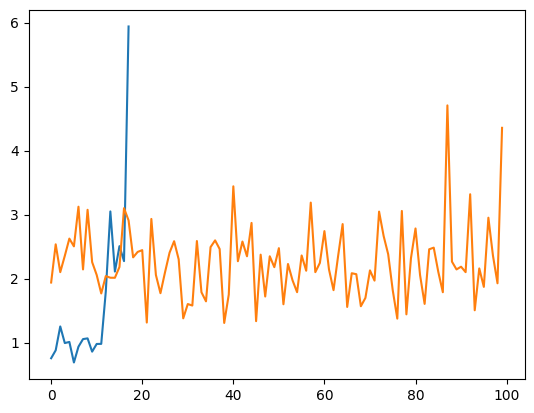

In [465]:
def calc_fano_factor(T_w):
    w = np.arange(0, T, T_w)
    resolved_counts = np.zeros((len(spike_times), len(w)))
    
    for i, spike_slice in zip(range(len(spike_times)), spike_times.T):
        for j, start, end in zip( range(len(w)), w, w+T_w):
            resolved_counts[i][j] = len(spike_slice[(start+0.00001 < spike_slice) & (spike_slice<end)])
        
    F_time_resolved = np.var(resolved_counts, axis=0)/ np.mean(resolved_counts, axis=0)
    F_trial_resolved = np.var(resolved_counts, axis=1) / np.mean(resolved_counts, axis=1)

    return F_time_resolved, F_trial_resolved

w = [0.3, 0.5, 1]

# ignore warning when deviding by zero.
np.seterr(divide='ignore', invalid='ignore')
time_w0_3, trial_w0_3 =  calc_fano_factor(w[0]) 

plt.plot(time_w0_3)
plt.plot(trial_w0_3)
plt.show()


In [438]:
for i in range(len(w)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
